<a href="https://colab.research.google.com/github/rameshawasthi/AI-Projects/blob/main/spam_message_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Data  Preprocessing 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
#train_test_split
from sklearn.model_selection import  train_test_split
# Building the Model  - random forrest Model spam classification 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
#confusion matrix
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
#SVM  Model
from sklearn.svm import SVC


In [ ]:
df = pd.read_csv("/content/spammessage.txt", sep = '\t')
#df = pd.read_csv("/content/spam.csv",encoding='latin1')


In [ ]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [ ]:
df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [ ]:
df.tail()

,label,message,length,punct
39013,spam,This is the 2nd time we have tried 2 contact u...,161,6
39014,ham,Will ü b going to esplanade fr home?,37,1
39015,ham,"Pity, * was in mood for that. So...any other s...",57,7
39016,ham,The guy did some bitching but I acted like i'd...,125,1
39017,ham,Rofl. Its true to its name,26,1


In [ ]:
df.describe()

,length,punct
count,39018.000000,39018.000000
mean,80.572531,3.725793
std,59.910463,3.896577
min,2.000000,0.000000
25%,36.000000,1.000000
50%,62.000000,3.000000
75%,122.000000,5.000000
max,910.000000,133.000000


In [ ]:
df ['label'].value_counts()* 100/ len(df)

ham     86.598493
spam    13.401507
Name: label, dtype: float64

In [ ]:
df['label'].value_counts()

ham     33789
spam     5229
Name: label, dtype: int64

In [ ]:
ham = df [df['label'] == 'ham'] 

In [ ]:
ham

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2
...,...,...,...,...
39011,ham,Huh y lei...,12,3
39014,ham,Will ü b going to esplanade fr home?,37,1
39015,ham,"Pity, * was in mood for that. So...any other s...",57,7
39016,ham,The guy did some bitching but I acted like i'd...,125,1


In [ ]:
spam = df [df['label'] == 'spam']

In [ ]:
spam

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8
...,...,...,...,...
38983,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,2
38986,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,160,5
38993,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,7
39012,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,4


In [ ]:
ham.shape, spam.shape

((33789, 4), (5229, 4))

In [ ]:
ham = ham.sample(spam.shape[0])

In [ ]:
ham.shape, spam.shape

((5229, 4), (5229, 4))

In [ ]:
data = ham.append(spam, ignore_index=True)

In [ ]:
data.shape

(10458, 4)

In [ ]:
data['label'].value_counts()

ham     5229
spam    5229
Name: label, dtype: int64

In [ ]:
data.head()

,label,message,length,punct
0,ham,Thats cool! I am a gentleman and will treat yo...,73,2
1,ham,Tell me something. Thats okay.,30,2
2,ham,"Urgh, coach hot, smells of chip fat! Thanks ag...",105,6
3,ham,Serious? What like proper tongued her,37,1
4,ham,Hi here. have birth at on the to at 8lb 7oz....,81,3


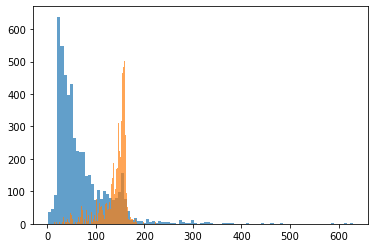

In [ ]:
plt.hist(data[data['label'] =='ham']['length'], bins =100, alpha = 0.7)
plt.hist(data[data['label'] =='spam']['length'], bins =100, alpha = 0.7)
plt.show()

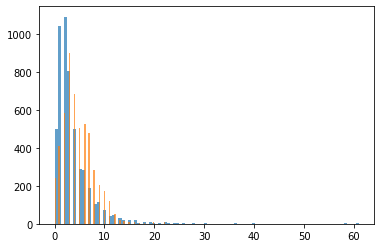

In [ ]:
plt.hist(data[data['label'] =='ham']['punct'], bins =100, alpha = 0.7)
plt.hist(data[data['label'] =='spam']['punct'], bins =100, alpha = 0.7)
plt.show()

In [ ]:
#data segregate for training and testing
data

,label,message,length,punct
0,ham,Thats cool! I am a gentleman and will treat yo...,73,2
1,ham,Tell me something. Thats okay.,30,2
2,ham,"Urgh, coach hot, smells of chip fat! Thanks ag...",105,6
3,ham,Serious? What like proper tongued her,37,1
4,ham,Hi here. have birth at on the to at 8lb 7oz....,81,3
...,...,...,...,...
10453,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,2
10454,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,160,5
10455,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,7
10456,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,4


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size = 0.3, random_state = 0, shuffle = True)

In [ ]:
x_train.shape, x_test.shape

((7320,), (3138,))

In [ ]:
classifier = Pipeline([("tfidf", TfidfVectorizer()), ("classifier", RandomForestClassifier(n_estimators=100))])

In [ ]:
classifier.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
y_test, y_pred

(3654     ham
 8612    spam
 2873     ham
 6983    spam
 2192     ham
         ... 
 2404     ham
 9829    spam
 4183     ham
 4532     ham
 3774     ham
 Name: label, Length: 3138, dtype: object,
 array(['ham', 'spam', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object))

In [ ]:
accuracy_score(y_test, y_pred)

1.0

In [ ]:
confusion_matrix(y_test, y_pred)

array([[1545,    0],
       [   0, 1593]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       1.00      1.00      1.00      1545
        spam       1.00      1.00      1.00      1593

    accuracy                           1.00      3138
   macro avg       1.00      1.00      1.00      3138
weighted avg       1.00      1.00      1.00      3138



In [ ]:
svm = Pipeline([("tfidf", TfidfVectorizer()), ("classifier", SVC(C = 100, gamma='auto'))])

In [ ]:
svm

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

In [ ]:
svm.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

In [ ]:
y_pred = svm.predict(x_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.9458253664754621

In [ ]:
confusion_matrix(y_test, y_pred)

array([[1535,   10],
       [ 160, 1433]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.91      0.99      0.95      1545
        spam       0.99      0.90      0.94      1593

    accuracy                           0.95      3138
   macro avg       0.95      0.95      0.95      3138
weighted avg       0.95      0.95      0.95      3138



In [ ]:
test_message1 = ['Hello, your are learning  Natural Language Processing']
test_message2 = ['Hope , you are doing good and learning new thing !.']
test_message3 = ['Congratulations, You won a lottery ticket worth $1 million !. To claim call on 444666']
test_message4 = ['Our records show you overpaid for (a product or service). Kindly supply your bank routing and account number to receive your refund.” Don’t fall for it.']
test_message5 = ["Hello,This is President Joan T. A. Gabel, the president of the University of Minnesota . I am sending this messages with my private number and it is needed to be treated with urgency. Kindly leave a message once you see this message.Thanks"]

In [ ]:
print(classifier.predict(test_message1))
print(classifier.predict(test_message2))
print(classifier.predict(test_message3))
print(classifier.predict(test_message4))
print(classifier.predict(test_message5))

['ham']
['ham']
['spam']
['ham']
['ham']


In [ ]:
print(svm.predict(test_message1))
print(svm.predict(test_message2))
print(svm.predict(test_message3))
print(svm.predict(test_message4))
print(svm.predict(test_message5))

['ham']
['ham']
['spam']
['spam']
['ham']
